In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_absolute_error , r2_score , root_mean_squared_error,accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

df = pd.read_csv("TSLA.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year
df['Year'] = df['Date'].dt.year
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,2010


In [3]:
#null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
 7   Year       2416 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1)
memory usage: 141.7 KB
None


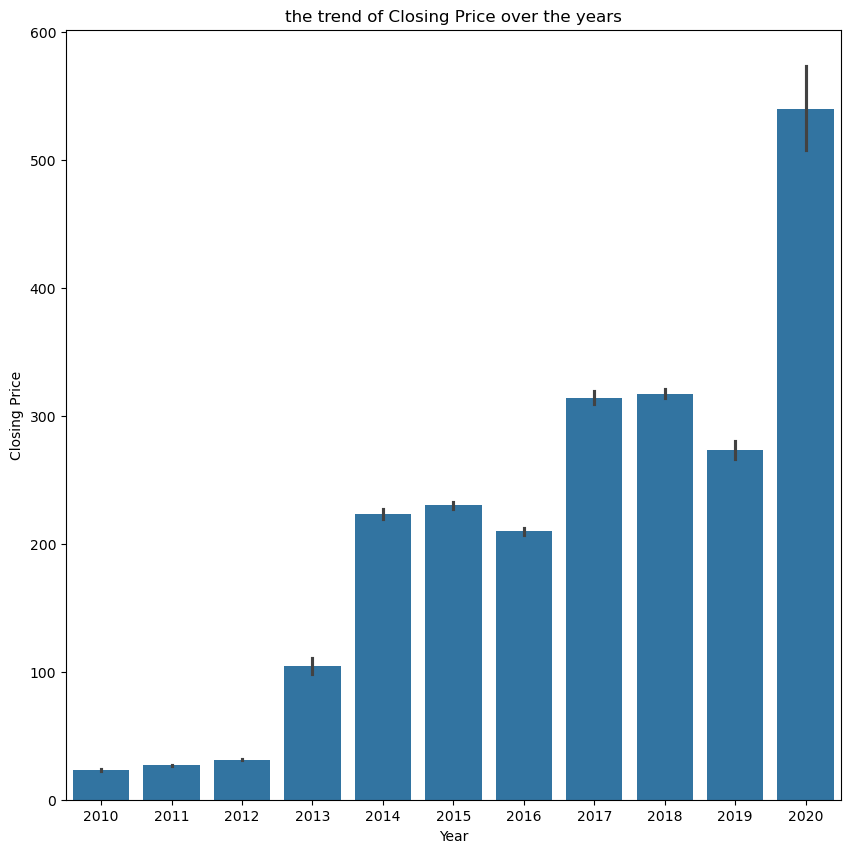

In [23]:

plt.figure(figsize=(10,10))
sns.barplot(data=df,x = "Year", y = "Adj Close")
plt.title("the trend of Closing Price over the years")
plt.ylabel("Closing Price")
plt.savefig("images/trend_of_closing_price_over_the_years.png")
plt.show()

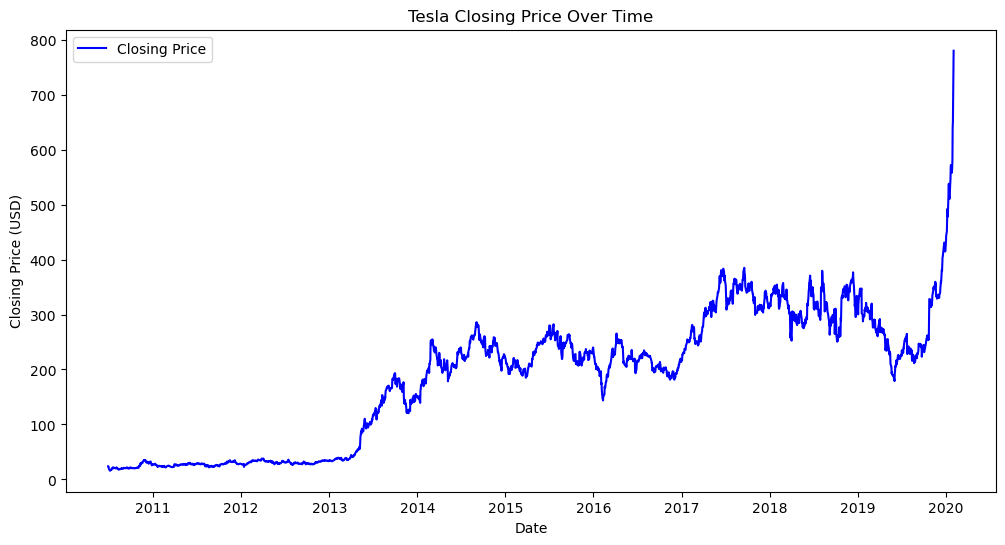

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title("Tesla Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.savefig("images/Tesla_Closing_Price_Over_time.png")
plt.show()


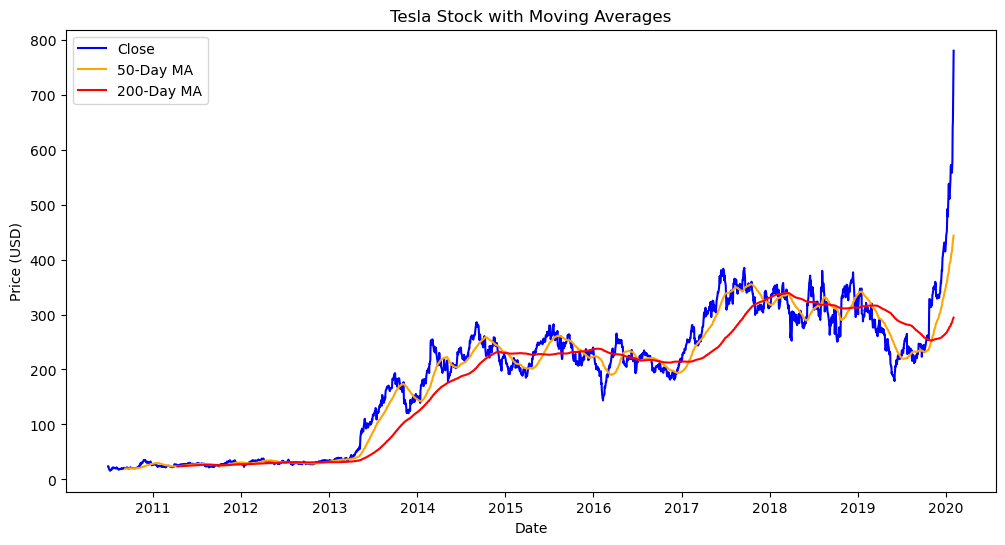

In [28]:
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close', color='blue')
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='orange')
plt.plot(df['Date'], df['MA200'], label='200-Day MA', color='red')
plt.title("Tesla Stock with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.savefig("images/Tesla_Stock_with_Moving_Average.png")
plt.show()


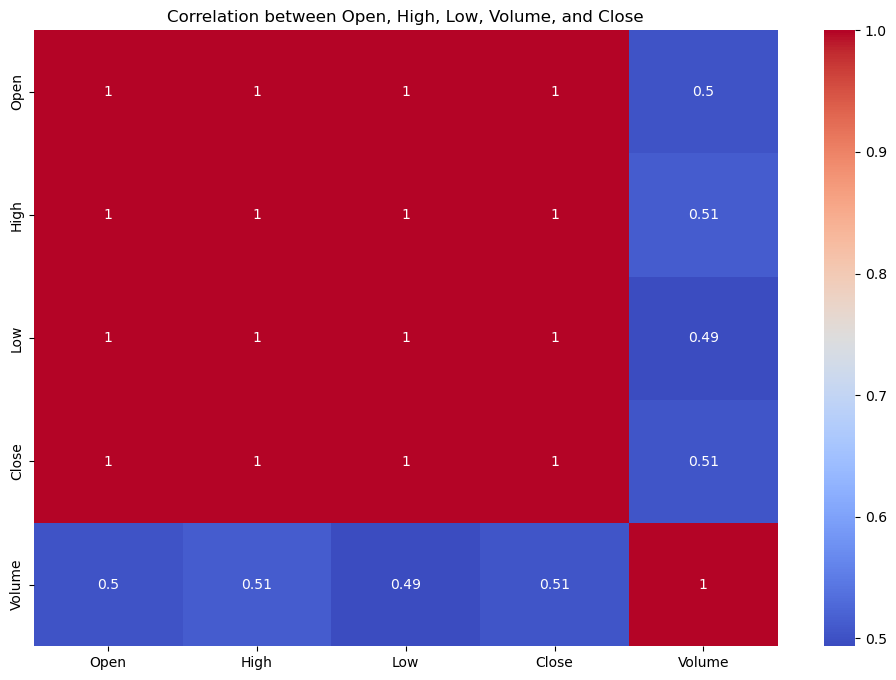

In [26]:
df_correlation = df[["Open","High","Low","Close","Volume"]].corr()

plt.figure(figsize=(12,8))
sns.heatmap(df_correlation,annot=True, cmap="coolwarm" )
plt.title("Correlation between Open, High, Low, Volume, and Close")
plt.savefig("images/Correlation_between_Open,_High,_Low,_Volume,_and_Close.png")
plt.show()

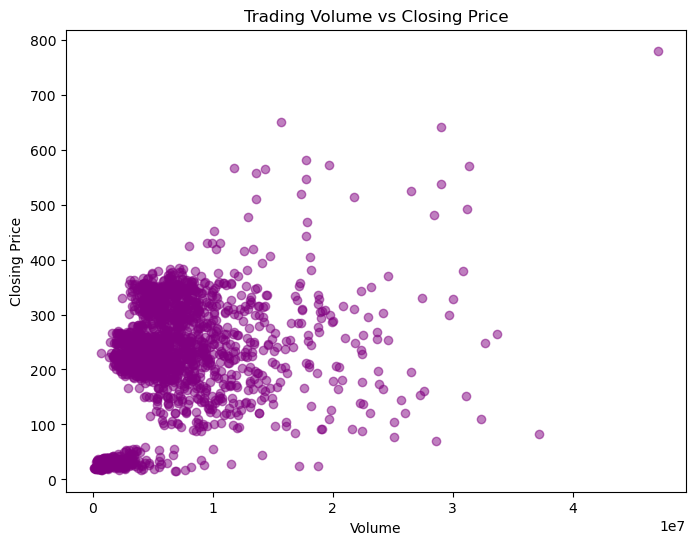

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5, color='purple')
plt.title("Trading Volume vs Closing Price")
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.savefig("images/Trading_Volume_vs_Closing_Price.png")
plt.show()


In [9]:
df.groupby("Volume")["Date"].idxmax()

Volume
118500        82
141000        70
161100        81
162800        77
171200        72
            ... 
32371900     766
32681700     920
33649700    2078
37163900     723
47065000    2415
Name: Date, Length: 2391, dtype: int64

In [10]:

# Find highest and lowest volume days
highest_volume = df.loc[df['Volume'].idxmax()]
lowest_volume = df.loc[df['Volume'].idxmin()]

print("Lowest Trading Volume Day:")
print(lowest_volume)

Lowest Trading Volume Day:
Date         2010-10-25 00:00:00
Open                   20.940001
High                       20.98
Low                        20.73
Close                      20.85
Adj Close                  20.85
Volume                    118500
Year                        2010
MA50                     20.3552
MA200                        NaN
Name: 82, dtype: object


In [11]:
print("Highest Trading Volume Day:")
print(highest_volume)

Highest Trading Volume Day:
Date         2020-02-03 00:00:00
Open                  673.690002
High                  786.140015
Low                    673.52002
Close                      780.0
Adj Close                  780.0
Volume                  47065000
Year                        2020
MA50                  443.600202
MA200                   294.3253
Name: 2415, dtype: object


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15656\2753073528.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Adj Close"],kde=True,color='darkred',bins=40)


<Axes: xlabel='Adj Close', ylabel='Density'>

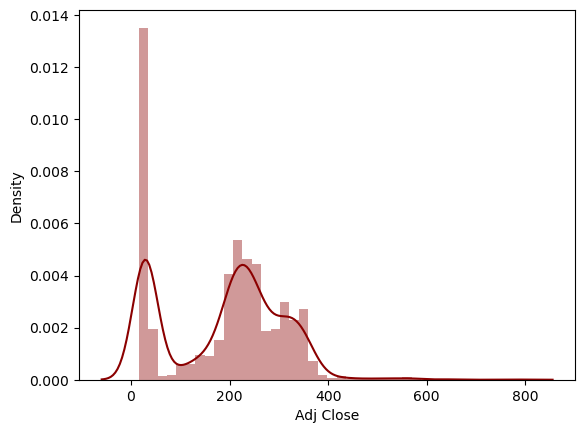

In [12]:
#distribution plot for Closing price
sns.distplot(df["Adj Close"],kde=True,color='darkred',bins=40)

In [13]:
#there is no missing values to report or anomalies
df.isnull().sum()
df.duplicated().sum()

0

In [14]:
import os
if not os.path.exists("images"):
    os.makedirs("images")


In [15]:
model = LinearRegression()

X = df[["Open","High","Low","Volume"]]
y = df["Close"]

X_train, X_test, y_train, y_test_linear = train_test_split(X, y, test_size=0.2, random_state=42)
# Train model
model.fit(X_train, y_train)

# Predictions
y_pred_linear = model.predict(X_test)

mae = mean_absolute_error(y_test_linear,y_pred_linear)
rmse = root_mean_squared_error(y_test_linear,y_pred_linear)
r2 = r2_score(y_test_linear,y_pred_linear)
print("Linear Regression MAE of Open , High , Low, Volume:", mae) 
print("Linear Regression RMSE of Open , High , Low, Volume:",rmse)
print("Linear Regression R2 Score of Open , High , Low, Volume:",r2)

Linear Regression MAE of Open , High , Low, Volume: 1.3377885628495352
Linear Regression RMSE of Open , High , Low, Volume: 2.092709940347191
Linear Regression R2 Score of Open , High , Low, Volume: 0.9997117604197425


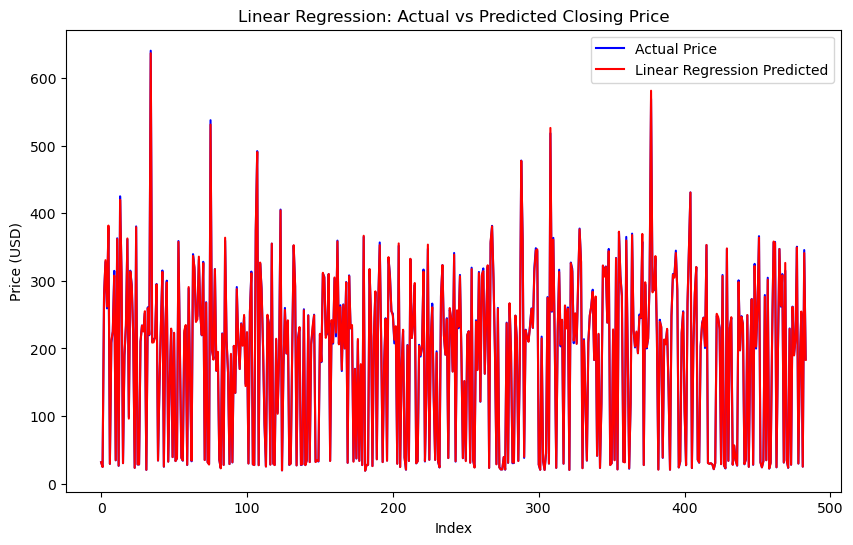

In [20]:
plt.figure(figsize=(10,6))
plt.plot(y_test_linear.values, label="Actual Price", color='blue')
plt.plot(y_pred_linear, label="Linear Regression Predicted", color='red')
plt.title("Linear Regression: Actual vs Predicted Closing Price")
plt.xlabel("Index")
plt.ylabel("Price (USD)")
plt.legend()
plt.savefig("images/linear_regression.png")
plt.show()


In [17]:
# Shift closing price to get "next day"
df['Price_Up'] = (df['Close'].shift(-1) > df['Close']).astype(int)


X = df[['Open','High','Low','Volume']]
y = df['Price_Up']

X_train, X_test, y_train, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test_class, y_pred_log))
print("Confusion Matrix:", confusion_matrix(y_test_class, y_pred_log))
print("Precision:", precision_score(y_test_class, y_pred_log))
print("Recall:", recall_score(y_test_class, y_pred_log))
print("F1 Score:", f1_score(y_test_class, y_pred_log))


Accuracy: 0.5144628099173554
Confusion Matrix: [[  1 235]
 [  0 248]]
Precision: 0.5134575569358178
Recall: 1.0
F1 Score: 0.6785225718194254


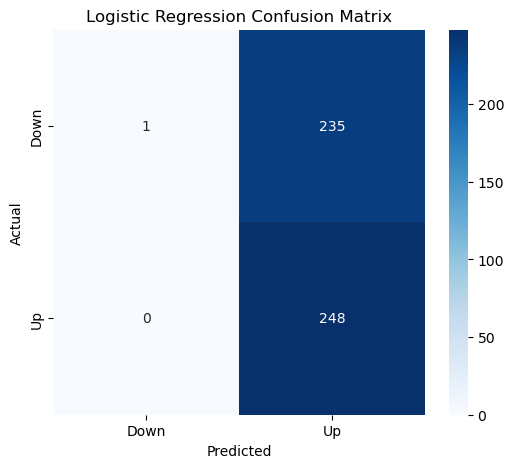

In [21]:
cm = confusion_matrix(y_test_class, y_pred_log)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("images/logistic_regression_cm.png")
plt.show()

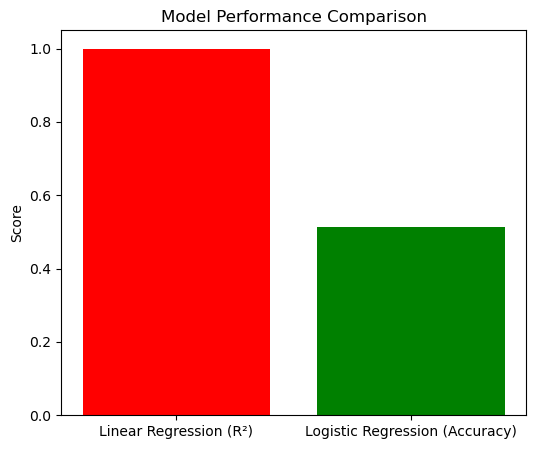

In [22]:
metrics = {
    "Linear Regression (R²)": r2_score(y_test_linear, y_pred_linear),
    "Logistic Regression (Accuracy)": accuracy_score(y_test_class, y_pred_log)
}

plt.figure(figsize=(6,5))
plt.bar(metrics.keys(), metrics.values(), color=['red','green'])
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.savefig("images/model_comparison.png")
plt.show()
